In [31]:
# Import libraries:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.animation import FuncAnimation
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# Number of detectors:
det_num = 91

# RF period (325 MHz frequency):
T = 1/(325*10**6)*10**9 # ns

# Figure directory:
dir = "Figures/"

In [32]:
# Values for all detectors:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []
t_vals = []; position = []
kde_vals = []
for j in range(det_num):

    # Load data from output txt files:
    data = np.loadtxt('out'+str(j+1)+'.txt')

    # Values for each detector:
    x = []; y = []; z = []
    px = []; py = []; pz = []
    t = []
    for i in range(data.shape[0]):
        x.append(data[i][0]/10) # mm -> cm
        y.append(data[i][1]/10)
        z.append(data[i][2]/10)
        px.append(data[i][3]) # MeV/c
        py.append(data[i][4])
        pz.append(data[i][5])
        t.append(data[i][6]) # ns
    
    # 2D Gaussian kernel density estimate:
    data = np.vstack([x,y])
    kde = gaussian_kde(data) # with positions in xy-plane
    kde_val = kde(data)
    kde_vals.append(kde_val)

    # Values for entire channel:
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)
    px_vals.append(px)
    py_vals.append(py)
    pz_vals.append(pz)
    t_vals.append(t)
    position.append(z[0]/100) # cm -> m

In [33]:
# Find center of distribution at each detector:
x_centers = []
y_centers = []
for i in range(det_num):
    x_center = np.mean(x_vals[i])
    y_center = np.mean(y_vals[i])
    print(x_center, y_center)
    x_centers.append(x_center)
    y_centers.append(y_center)

0.12214777777777795 0.15964610606060609
0.5757977734693877 1.0828009897959183
0.29645333684210523 -1.3466679463157896
-1.0978885806818182 1.4488833704545454
0.3883534678571427 0.20110011845238096
0.17068796216216214 -1.5656989756756756
-1.533692907246377 0.7548834942028986
0.3430077375000001 2.2628283535714284
2.0054576450980393 -2.113373844117647
-3.120749720930233 -1.2662937674418604
-0.288381761904762 4.131148166666667
3.9098285714285717 -2.6418281190476187
-4.6688395 -1.4620697
2.0539033846153845 4.054765051282051
0.48991959794871803 -3.4568195333333334
-0.9497537256410257 1.4958778435897433
-0.16207728205128208 -0.30784169230769226
1.3421663051282051 0.2496858717948718
-1.3300395384615384 -1.0754150487179488
-0.11800691025641019 1.6895376153846156
2.303799425641026 -0.865592846153846
-3.3035653076923075 -1.5997592487179488
1.6771159717948718 3.695266128205129
2.0015528499999995 -3.3107330499999996
-4.130112972222222 0.32079803888888875
1.639960696969697 3.9985826666666666
2.351532

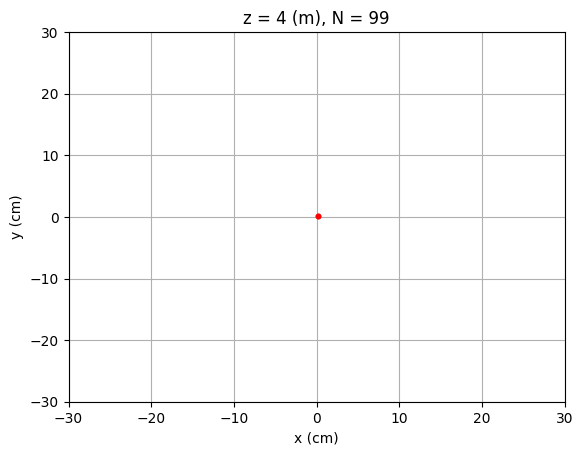

In [35]:
# Animated plot of center of distribution with path:
fig = plt.figure()
cmap = plt.get_cmap('coolwarm')
def animate(frame):
    plt.clf()
    plt.scatter(x_centers[frame], y_centers[frame], color='red', label='Center',zorder=5,s=10)
    # plt.plot(x_centers[:frame+1],y_centers[:frame+1],color='grey',linewidth=1)
    for i in range(frame):
        color = cmap(i/len(position))
        plt.plot(x_centers[(i-1):(i+2)],y_centers[(i-1):(i+2)],color=color,linewidth=1)
    plt.xlim(-30,30)
    plt.ylim(-30,30)
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')
    plt.title('z = '+str(round(position[frame]))+' (m), N = '+str(len(x_vals[frame])))
    plt.grid()
    plt.scatter(x_centers[frame], y_centers[frame], color='red', label='Center',zorder=5,s=10)
animation = FuncAnimation(fig, animate, frames=det_num, interval=500, repeat=True)
animation.save(dir+'center_distribution_animation_channel_with_path.gif', writer='pillow')

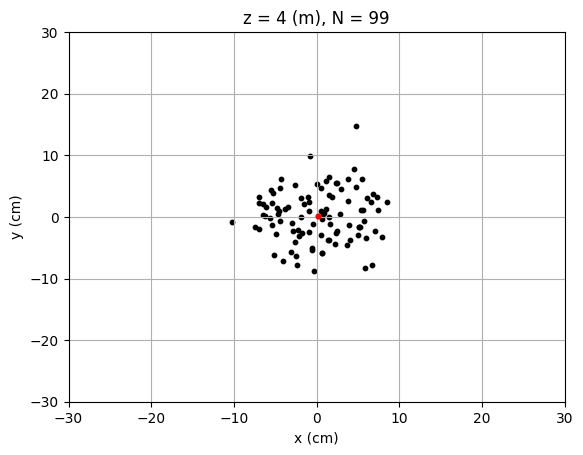

In [34]:
# Animated plot of entire distribution:
fig = plt.figure()
def animate(frame):
    plt.clf()
    plt.scatter(x_vals[frame], y_vals[frame], color='black',s=10)
    plt.scatter(x_centers[frame], y_centers[frame], color='red', label='Center',zorder=5,s=10)
    plt.xlim(-30,30)
    plt.ylim(-30,30)
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')
    plt.title('z = '+str(round(position[frame]))+' (m), N = '+str(len(x_vals[frame])))
    plt.grid()
    plt.scatter(x_centers[frame], y_centers[frame], color='red', label='Center',zorder=5,s=10)
animation = FuncAnimation(fig, animate, frames=det_num, interval=500, repeat=True)
animation.save(dir+'scatter_animation_channel.gif', writer='pillow')

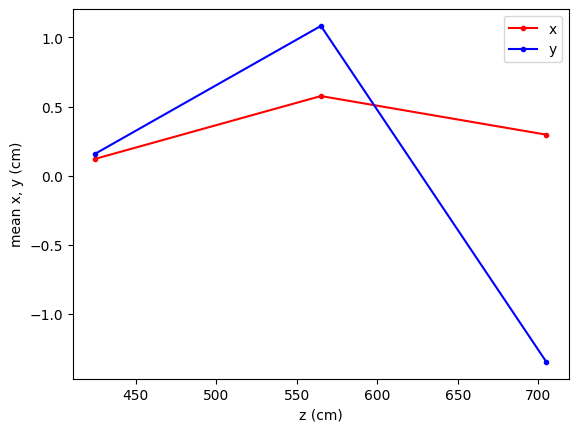

In [6]:
# Plot mean x, y along z:
# plt.plot([np.mean(i) for i in z_vals],[np.mean(i) for i in x_vals],marker='.',color='red',label='x')
# plt.plot([np.mean(i) for i in z_vals],[np.mean(i) for i in y_vals],marker='.',color='blue',label='y')
plt.plot([np.mean(i) for i in z_vals[:3]],[np.mean(i) for i in x_vals[:3]],marker='.',color='red',label='x')
plt.plot([np.mean(i) for i in z_vals[:3]],[np.mean(i) for i in y_vals[:3]],marker='.',color='blue',label='y')
plt.xlabel('z (cm)')
plt.ylabel('mean x, y (cm)')
plt.legend()